In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
import seaborn as sns

In [3]:
shots=pd.read_csv('..\data\produced_datasets\season_18_19_shots.csv',index_col=[0])
shots['location']=[literal_eval(value) for value in shots['location']]
shots['shot.end_location']=[literal_eval(value) for value in shots['shot.end_location']]

In [4]:
shots['player.name'].value_counts()

Lionel Andrés Messi Cuccittini            167
Luis Alberto Suárez Díaz                   98
Philippe Coutinho Correia                  65
Ivan Rakitić                               35
Ousmane Dembélé                            34
Arturo Erasmo Vidal Pardo                  22
Gerard Piqué Bernabéu                      20
Jordi Alba Ramos                           13
Carles Aleña Castillo                       9
Malcom Filipe Silva de Oliveira             9
Sergi Roberto Carnicer                      8
Nélson Cabral Semedo                        6
Clément Lenglet                             6
Sergio Busquets i Burgos                    6
Arthur Henrique Ramos de Oliveira Melo      4
Munir El Haddadi Mohamed                    3
Kevin-Prince Boateng                        2
Thomas Vermaelen                            2
Samuel Yves Umtiti                          1
Abel Ruiz Ortega                            1
Carles Pérez Sayol                          1
Denis Suárez Fernández            

In [5]:
shots.dtypes

index                    int64
minute                   int64
second                   int64
player.id              float64
player.name             object
location                object
shot.type.id           float64
shot.type.name          object
shot.body_part.id      float64
shot.body_part.name     object
shot.technique.id      float64
shot.technique.name     object
shot.first_time         object
shot.freeze_frame       object
shot.outcome.id        float64
shot.outcome.name       object
shot.end_location       object
under_pressure            bool
dtype: object

In [6]:
luis=shots[(shots['player.id']==5246.0) & (shots['shot.type.id']==87.0)]

In [7]:
luis['shot.technique.id'].value_counts()

93.0    65
91.0    12
95.0     8
92.0     6
94.0     1
90.0     1
Name: shot.technique.id, dtype: int64

In [8]:
luis['shot.body_part.id'].value_counts()

40.0    67
38.0    22
37.0     4
Name: shot.body_part.id, dtype: int64

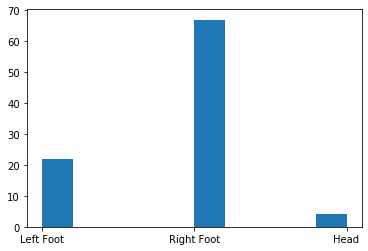

In [9]:
plt.hist(luis['shot.body_part.name'])
plt.show()

In [10]:
luis[luis['shot.body_part.id']==37.0]

,index,minute,second,player.id,player.name,location,shot.type.id,shot.type.name,shot.body_part.id,shot.body_part.name,shot.technique.id,shot.technique.name,shot.first_time,shot.freeze_frame,shot.outcome.id,shot.outcome.name,shot.end_location,under_pressure
40,2508,55,16,5246.0,Luis Alberto Suárez Díaz,"[112.1, 40.2]",87.0,Open Play,37.0,Head,93.0,Normal,NaN,"[{'location': [109.1, 42.3], 'player': {'id': ...",100.0,Saved,"[119.1, 39.4, 0.9]",False
196,3627,89,4,5246.0,Luis Alberto Suárez Díaz,"[112.2, 48.6]",87.0,Open Play,37.0,Head,90.0,Diving Header,NaN,"[{'location': [91.4, 51.9], 'player': {'id': 6...",98.0,Off T,"[120.0, 35.4, 2.5]",False
288,2506,61,49,5246.0,Luis Alberto Suárez Díaz,"[115.7, 39.3]",87.0,Open Play,37.0,Head,95.0,Volley,True,"[{'location': [105.0, 40.9], 'player': {'id': ...",101.0,Wayward,"[118.8, 39.7]",True
353,977,21,33,5246.0,Luis Alberto Suárez Díaz,"[113.5, 38.1]",87.0,Open Play,37.0,Head,93.0,Normal,NaN,"[{'location': [106.6, 21.3], 'player': {'id': ...",98.0,Off T,"[120.0, 32.9, 0.5]",True


In [11]:
x=np.arange(40,121,8)
y=np.arange(0,81,8)
res_x = list(map(list, zip(x, x[1:])))
res_y = list(map(list, zip(y, y[1:])))
dic_y={res_y.index(element):element for element in res_y}
dic_x={res_x.index(element):element for element in res_x}
luis['zone_x']=[key for value in luis['location'] for key,result in dic_x.items() if (value[0]>=result[0]) & (value[0]<result[1])]
luis['zone_y']=[key for value in luis['location'] for key,result in dic_y.items() if (value[1]>=result[0]) & (value[1]<result[1])]
luis['zone'] = list(zip(luis.zone_x, luis.zone_y))

C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [62]:
dic_y

{0: [0, 8],
 1: [8, 16],
 2: [16, 24],
 3: [24, 32],
 4: [32, 40],
 5: [40, 48],
 6: [48, 56],
 7: [56, 64],
 8: [64, 72],
 9: [72, 80]}

In [12]:
luis['to_goal']=[len(value)==3 for value in luis['shot.end_location']]
luis_made=luis[luis['to_goal']==True]
luis_made['on_goal_loc']=[[element[1],element[2]] if (element[1]>=36.0) & (element[1]<=44.0) & (element[2]<=2.67) & (element[2]>0) else 0 for element in luis_made['shot.end_location']]
luis_shots_on_goal=luis_made[luis_made['on_goal_loc']!=0]
luis_shots_on_goal['goal_x']=[element[0] for element in luis_shots_on_goal['on_goal_loc']]
luis_shots_on_goal['goal_y']=[element[1] for element in luis_shots_on_goal['on_goal_loc']]

C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [13]:
luis_shots_on_goal

,index,minute,second,player.id,player.name,location,shot.type.id,shot.type.name,shot.body_part.id,shot.body_part.name,...,shot.outcome.name,shot.end_location,under_pressure,zone_x,zone_y,zone,to_goal,on_goal_loc,goal_x,goal_y
2,1799,39,16,5246.0,Luis Alberto Suárez Díaz,"[106.0, 46.0]",87.0,Open Play,38.0,Left Foot,...,Saved,"[117.8, 42.0, 0.2]",False,8,5,"(8, 5)",True,"[42.0, 0.2]",42.0,0.2
9,2816,62,14,5246.0,Luis Alberto Suárez Díaz,"[109.8, 38.8]",87.0,Open Play,40.0,Right Foot,...,Goal,"[120.0, 36.8, 0.2]",False,8,4,"(8, 4)",True,"[36.8, 0.2]",36.8,0.2
10,3297,73,5,5246.0,Luis Alberto Suárez Díaz,"[107.4, 49.4]",87.0,Open Play,40.0,Right Foot,...,Saved,"[116.6, 42.1, 0.2]",False,8,6,"(8, 6)",True,"[42.1, 0.2]",42.1,0.2
19,1617,38,26,5246.0,Luis Alberto Suárez Díaz,"[99.9, 38.9]",87.0,Open Play,38.0,Left Foot,...,Saved,"[116.1, 42.1, 0.7]",True,7,4,"(7, 4)",True,"[42.1, 0.7]",42.1,0.7
35,3547,81,7,5246.0,Luis Alberto Suárez Díaz,"[113.6, 42.9]",87.0,Open Play,40.0,Right Foot,...,Goal,"[120.0, 40.8, 0.2]",False,9,5,"(9, 5)",True,"[40.8, 0.2]",40.8,0.2
37,955,18,21,5246.0,Luis Alberto Suárez Díaz,"[107.6, 30.6]",87.0,Open Play,40.0,Right Foot,...,Goal,"[120.0, 43.5, 0.4]",False,8,3,"(8, 3)",True,"[43.5, 0.4]",43.5,0.4
40,2508,55,16,5246.0,Luis Alberto Suárez Díaz,"[112.1, 40.2]",87.0,Open Play,37.0,Head,...,Saved,"[119.1, 39.4, 0.9]",False,9,5,"(9, 5)",True,"[39.4, 0.9]",39.4,0.9
43,2636,58,23,5246.0,Luis Alberto Suárez Díaz,"[115.1, 53.1]",87.0,Open Play,40.0,Right Foot,...,Goal,"[120.0, 40.3, 0.2]",False,9,6,"(9, 6)",True,"[40.3, 0.2]",40.3,0.2
58,3854,92,26,5246.0,Luis Alberto Suárez Díaz,"[108.1, 33.1]",87.0,Open Play,40.0,Right Foot,...,Saved,"[118.3, 38.8, 1.3]",False,8,4,"(8, 4)",True,"[38.8, 1.3]",38.8,1.3
62,2000,41,1,5246.0,Luis Alberto Suárez Díaz,"[107.8, 27.8]",87.0,Open Play,40.0,Right Foot,...,Saved,"[118.2, 36.0, 0.2]",False,8,3,"(8, 3)",True,"[36.0, 0.2]",36.0,0.2


In [41]:
x_goal=luis_shots_on_goal[luis_shots_on_goal['shot.outcome.name']=='Goal']['goal_x']
y_goal=luis_shots_on_goal[luis_shots_on_goal['shot.outcome.name']=='Goal']['goal_y']
x_no_goal=luis_shots_on_goal[luis_shots_on_goal['shot.outcome.name']!='Goal']['goal_x']
y_no_goal=luis_shots_on_goal[luis_shots_on_goal['shot.outcome.name']!='Goal']['goal_y']

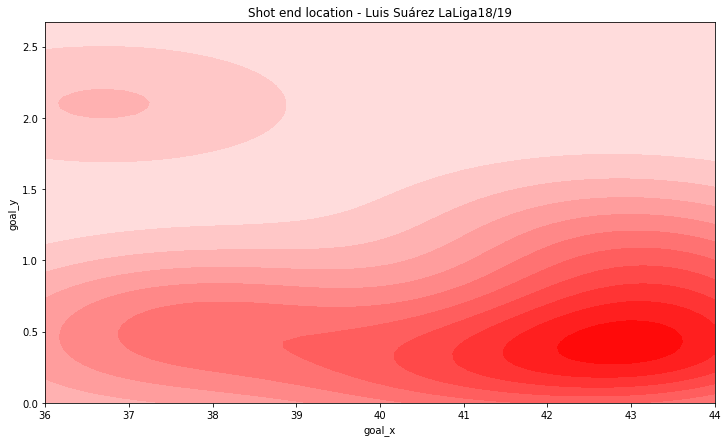

In [49]:
fig=plt.figure() #set up the figures
fig.set_size_inches(12, 7)
sns.kdeplot(x_goal, y_goal, shade=True, color='red')
plt.ylim(0, 2.67)
plt.xlim(36, 44)
plt.title('Shot end location - Luis Suárez LaLiga18/19')
plt.show()

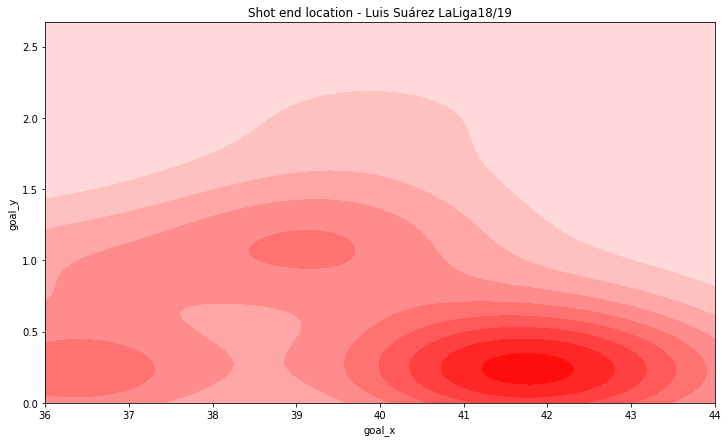

In [63]:
fig=plt.figure() #set up the figures
fig.set_size_inches(12, 7)
sns.kdeplot(x_no_goal, y_no_goal, shade=True, color='red')
plt.ylim(0, 2.67)
plt.xlim(36, 44)
plt.title('Shot end location - Luis Suárez LaLiga18/19')
plt.show()

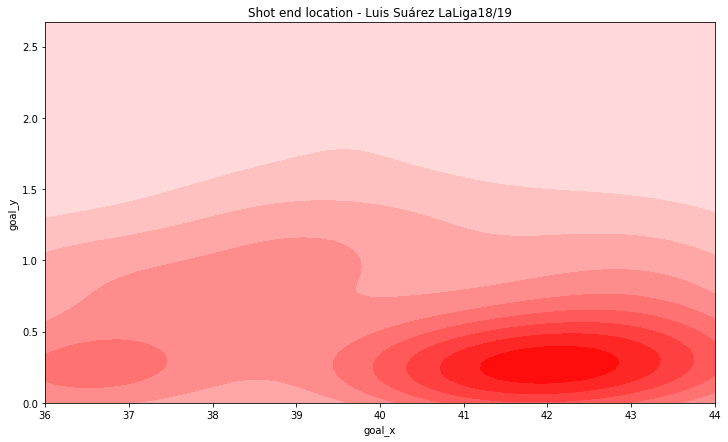

In [56]:
fig=plt.figure() #set up the figures
fig.set_size_inches(12, 7)
sns.kdeplot(luis_shots_on_goal['goal_x'], luis_shots_on_goal['goal_y'], shade=True, color='red')
plt.ylim(0, 2.67)
plt.xlim(36, 44)
plt.title('Shot end location - Luis Suárez LaLiga18/19')
plt.show()

In [59]:
luis_shots_on_goal['zone'].value_counts()

(8, 5)    5
(8, 4)    4
(8, 3)    4
(9, 5)    3
(9, 4)    3
(7, 4)    2
(9, 3)    2
(9, 6)    2
(7, 5)    2
(6, 4)    2
(8, 6)    1
(3, 9)    1
(7, 6)    1
(7, 3)    1
Name: zone, dtype: int64

In [58]:
luis_shots_on_goal.groupby('zone')['goal_x','goal_y'].mean()

C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,goal_x,goal_y
zone,,
"(3, 9)",39.900000,2.000
"(6, 4)",37.950000,1.150
"(7, 3)",43.700000,0.200
"(7, 4)",42.100000,0.450
"(7, 5)",42.550000,0.550
"(7, 6)",43.000000,0.400
"(8, 3)",38.025000,0.425
"(8, 4)",39.975000,0.675
"(8, 5)",40.060000,0.740
